# Import Dataset

In [2]:
import pandas as pd
import re

df = pd.read_csv('tweets.csv')

df.head()

,Date,User,Tweet
0,2023-06-25 11:39:11+00:00,kopibir_,@arsxnova loh dimana deh harusnya etilang kan ...
1,2023-06-22 09:53:54+00:00,tehtareek,"@apharajita katanya itu scam gitu, etilang rat..."
2,2023-06-21 15:47:37+00:00,tehtareek,"guys, help.\r\ngue buka link di pesan melalui ..."
3,2023-06-21 15:38:19+00:00,tehtareek,"guys, gue dapat pesan etilang kayak gini. pas ..."
4,2023-06-21 15:36:22+00:00,tehtareek,@TMCPoldaMetro mohon maaf saya ingin memberita...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    800 non-null    object
 1   User    800 non-null    object
 2   Tweet   800 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB


In [4]:
df.shape

(800, 3)

# Preprocessing

In [5]:
def remove_user_tags(text):
    # Remove user tags (e.g., @TMCPoldaMetro)
    processed_text = re.sub(r'@\w+', '', text)
    return processed_text

In [6]:
def remove_emojis(text):
    # Remove emojis using regex
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              u"\U00002500-\U00002BEF"  # Chinese characters
                              u"\U00002702-\U000027B0"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              u"\U0001f926-\U0001f937"
                              u"\U00010000-\U0010ffff"
                              u"\u2640-\u2642"
                              u"\u2600-\u2B55"
                              u"\u200d"
                              u"\u23cf"
                              u"\u23e9"
                              u"\u231a"
                              u"\ufe0f"  # dingbats
                              u"\u3030"
                              "]+", flags=re.UNICODE)
    processed_text = emoji_pattern.sub(r'', text)
    return processed_text

In [7]:
def lowercase_text(text):
    # Convert the text to lowercase and remove whitespace
    processed_text = text.lower().strip()
    return processed_text

In [8]:
def remove_urls(text):
    # Remove URLs and new lines using regex
    processed_text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    processed_text = processed_text.replace('\n', ' ').replace('\r', '')  # Remove new lines
    return processed_text

In [9]:
df['Tweet'] = df['Tweet'].apply(remove_user_tags)
df['Tweet'] = df['Tweet'].apply(remove_emojis)
df['Tweet'] = df['Tweet'].apply(lowercase_text)
df['Tweet'] = df['Tweet'].apply(remove_urls)

In [10]:
df.head()

,Date,User,Tweet
0,2023-06-25 11:39:11+00:00,kopibir_,loh dimana deh harusnya etilang kan skrg?
1,2023-06-22 09:53:54+00:00,tehtareek,"katanya itu scam gitu, etilang rata2 kirim sur..."
2,2023-06-21 15:47:37+00:00,tehtareek,"guys, help. gue buka link di pesan melalui goo..."
3,2023-06-21 15:38:19+00:00,tehtareek,"guys, gue dapat pesan etilang kayak gini. pas ..."
4,2023-06-21 15:36:22+00:00,tehtareek,mohon maaf saya ingin memberitahukan bahwa say...


Export preporcessed Dataset

In [11]:
# export
filename = 'tweets_preprocessed.csv'
df.to_csv(filename, index=False)

print(f"Dataframe exported to {filename} successfuly")

Dataframe exported to tweets_preprocessed.csv successfuly


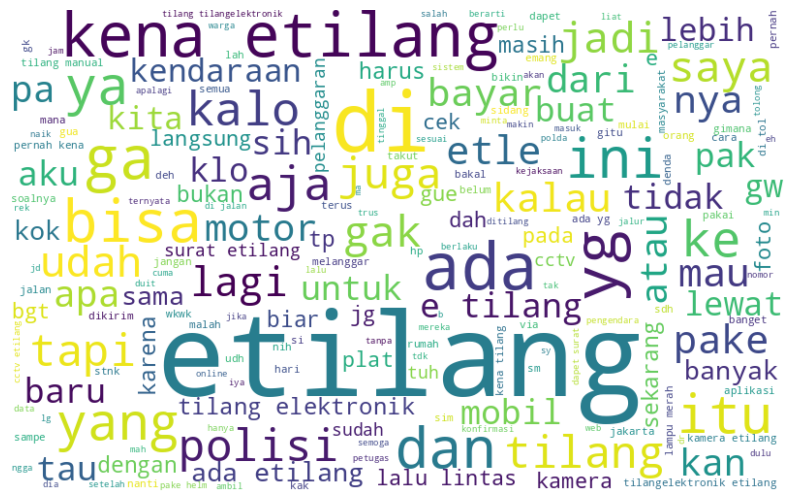

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

all_words = ' '.join(df['Tweet'])
wordCloud(all_words)

# Sentiment

## NLTK

In [13]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [14]:
sia = SentimentIntensityAnalyzer()

In [15]:
def get_sentiment_score(tweet):
    sentiment = sia.polarity_scores(tweet)
    return sentiment['compound']


In [16]:
df['Sentiment_Score'] = df['Tweet'].apply(get_sentiment_score)

In [17]:
df.head(10)

,Date,User,Tweet,Sentiment_Score
0,2023-06-25 11:39:11+00:00,kopibir_,loh dimana deh harusnya etilang kan skrg?,0.0000
1,2023-06-22 09:53:54+00:00,tehtareek,"katanya itu scam gitu, etilang rata2 kirim sur...",-0.5719
2,2023-06-21 15:47:37+00:00,tehtareek,"guys, help. gue buka link di pesan melalui goo...",0.4696
3,2023-06-21 15:38:19+00:00,tehtareek,"guys, gue dapat pesan etilang kayak gini. pas ...",0.0000
4,2023-06-21 15:36:22+00:00,tehtareek,mohon maaf saya ingin memberitahukan bahwa say...,0.0000
5,2023-06-21 06:40:07+00:00,DanieRedline,jujur gausah buat sim kalo lu gapernah riding ...,0.0000
6,2023-06-17 03:16:18+00:00,8thgreyy,hrusnya minta etilang ajaa,0.0000
7,2023-06-14 08:53:14+00:00,phoenxblue,"udah stress, tbtb dapet surat etilang dikirim ...",-0.4215
8,2023-06-14 07:57:54+00:00,No_Nyampah,ini ditindakan etilang gak? saya jepret hari i...,0.0000
9,2023-06-13 12:20:00+00:00,kucingbuntung,resiko telat bayar etilang opo lekk...,0.0000


In [18]:
def get_sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Category'] = df['Sentiment_Score'].apply(get_sentiment_category)


In [19]:
df.head(15)

,Date,User,Tweet,Sentiment_Score,Sentiment_Category
0,2023-06-25 11:39:11+00:00,kopibir_,loh dimana deh harusnya etilang kan skrg?,0.0000,Neutral
1,2023-06-22 09:53:54+00:00,tehtareek,"katanya itu scam gitu, etilang rata2 kirim sur...",-0.5719,Negative
2,2023-06-21 15:47:37+00:00,tehtareek,"guys, help. gue buka link di pesan melalui goo...",0.4696,Positive
3,2023-06-21 15:38:19+00:00,tehtareek,"guys, gue dapat pesan etilang kayak gini. pas ...",0.0000,Neutral
4,2023-06-21 15:36:22+00:00,tehtareek,mohon maaf saya ingin memberitahukan bahwa say...,0.0000,Neutral
5,2023-06-21 06:40:07+00:00,DanieRedline,jujur gausah buat sim kalo lu gapernah riding ...,0.0000,Neutral
6,2023-06-17 03:16:18+00:00,8thgreyy,hrusnya minta etilang ajaa,0.0000,Neutral
7,2023-06-14 08:53:14+00:00,phoenxblue,"udah stress, tbtb dapet surat etilang dikirim ...",-0.4215,Negative
8,2023-06-14 07:57:54+00:00,No_Nyampah,ini ditindakan etilang gak? saya jepret hari i...,0.0000,Neutral
9,2023-06-13 12:20:00+00:00,kucingbuntung,resiko telat bayar etilang opo lekk...,0.0000,Neutral


In [20]:
df['Sentiment_Category'].value_counts()

Neutral     719
Negative     46
Positive     35
Name: Sentiment_Category, dtype: int64

## TextBlob

In [27]:
from textblob import TextBlob

In [28]:
def get_sentiment_score_blob(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    return polarity

In [29]:
df['Sentiment_Score_Blob'] = df['Tweet'].apply(get_sentiment_score_blob)

In [30]:
df['Sentiment_Category_Blob'] = df['Sentiment_Score_Blob'].apply(get_sentiment_category)

In [32]:
df.head(10)

,Date,User,Tweet,Sentiment_Score,Sentiment_Category,Sentiment_Score_Blob,Sentiment_Category_Blob
0,2023-06-25 11:39:11+00:00,kopibir_,loh dimana deh harusnya etilang kan skrg?,0.0000,Neutral,0.0,Neutral
1,2023-06-22 09:53:54+00:00,tehtareek,"katanya itu scam gitu, etilang rata2 kirim sur...",-0.5719,Negative,0.0,Neutral
2,2023-06-21 15:47:37+00:00,tehtareek,"guys, help. gue buka link di pesan melalui goo...",0.4696,Positive,0.0,Neutral
3,2023-06-21 15:38:19+00:00,tehtareek,"guys, gue dapat pesan etilang kayak gini. pas ...",0.0000,Neutral,0.0,Neutral
4,2023-06-21 15:36:22+00:00,tehtareek,mohon maaf saya ingin memberitahukan bahwa say...,0.0000,Neutral,0.0,Neutral
5,2023-06-21 06:40:07+00:00,DanieRedline,jujur gausah buat sim kalo lu gapernah riding ...,0.0000,Neutral,0.0,Neutral
6,2023-06-17 03:16:18+00:00,8thgreyy,hrusnya minta etilang ajaa,0.0000,Neutral,0.0,Neutral
7,2023-06-14 08:53:14+00:00,phoenxblue,"udah stress, tbtb dapet surat etilang dikirim ...",-0.4215,Negative,0.0,Neutral
8,2023-06-14 07:57:54+00:00,No_Nyampah,ini ditindakan etilang gak? saya jepret hari i...,0.0000,Neutral,0.0,Neutral
9,2023-06-13 12:20:00+00:00,kucingbuntung,resiko telat bayar etilang opo lekk...,0.0000,Neutral,0.0,Neutral


In [33]:
df['Sentiment_Category_Blob'].value_counts()

Neutral     741
Positive     39
Negative     20
Name: Sentiment_Category_Blob, dtype: int64